### Table of Contents

* [Part 1. Exploratory Analysis](#part1) 
    * [Section 1.1 Exploratory Analysis](#section_1_1)
    * [Section 1.2 Visual Comparison of Forecasts](#section_1_2)
    * [Section 1.3 MSE/MAE Calculation](#section_1_3)
        
* [Part 2. Promotional Sales](#part2)
* [Part 3. Generating Forecast](#part3)

The goal is to detrmine which forecast is making better predictions based on two prediction files compared to actual sales, as well as build a model that will provide reasonable predictions

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
plt.rc('figure', figsize=(15, 5))

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder

import tensorflow as tf
import tensorflow.keras as keras
#import seaborn as sns
#sns.set()
#from datetime import datetime
#from datetime import timedelta

## Part 1 <a class="anchor" id="part1"></a>
### Exploratory analysis and comparison of two forecasts vs. the actual sales.

#### Section 1.1 <a class="anchor" id="section_1_1"></a>
EXPLORATORY ANALYSIS

In [2]:
#we'll convert all values to lower case and ensure the important column "transaction_date" has date data type
sales = pd.read_csv('sales.csv', parse_dates =  [2], converters = {1:lambda x:x.lower()})
sales.head()

,sku,product_category,TRANSACTION_DATE,PROMO_YEAR_ID,PROMO_WEEK_NUMBER,units_sold,units_revenue
0,68305839534,oral care,2020-09-19,2021,26,25.0,58.58
1,817513010132,hair care,2020-09-19,2021,26,1.0,18.99
2,56100029274,oral care,2020-09-19,2021,26,39.0,175.11
3,309976768021,mass color cosmetics,2020-09-19,2021,26,3.0,47.97
4,64541300623,cough & cold,2020-09-19,2021,26,15.0,136.15


In [3]:
sales.columns = sales.columns.str.lower()

In [4]:
sales_grouped  = sales.groupby(['transaction_date']).sum()

In [5]:
sales_grouped

,sku,promo_year_id,promo_week_number,units_sold,units_revenue
transaction_date,,,,,
2020-08-28,10219422750865828,40278530,458390,244608.0,1617139.32
2020-08-29,9379716319458232,37996821,432423,202563.0,1358503.29
2020-08-30,8437569698198153,35215925,400775,160194.0,1092972.09
2020-08-31,9554906619141312,38560680,438840,199549.0,1410308.23
2020-09-01,10624446168390686,41307219,470097,251982.0,1790520.43
2020-09-02,9586730651864656,38603121,439323,201471.0,1425362.21
2020-09-03,9636982047015430,39146770,445510,196114.0,1422057.48
2020-09-04,10429701043515020,40907061,485784,270837.0,1756838.18
2020-09-05,9474472450276634,38283803,454632,213771.0,1405644.54


<AxesSubplot:xlabel='transaction_date'>

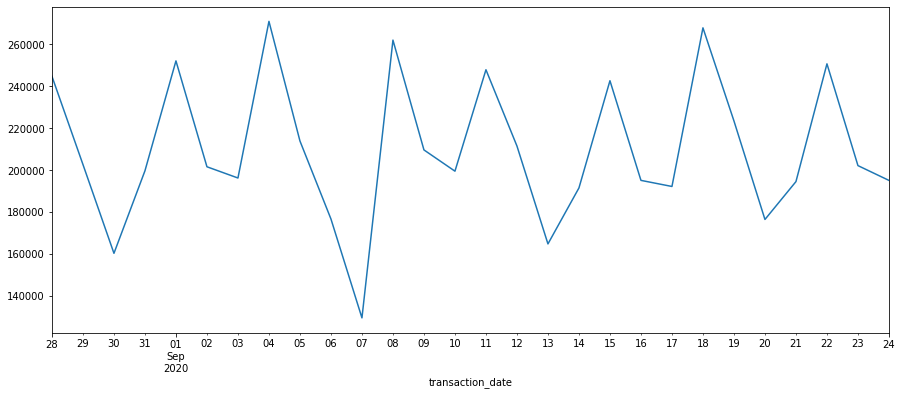

In [6]:
sales_grouped.units_sold.plot(figsize = (15,6))

In [7]:
sales.info()
#no misisng values to impute, all column datatypes have been inferred correctly

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532030 entries, 0 to 532029
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   sku                532030 non-null  int64         
 1   product_category   532030 non-null  object        
 2   transaction_date   532030 non-null  datetime64[ns]
 3   promo_year_id      532030 non-null  int64         
 4   promo_week_number  532030 non-null  int64         
 5   units_sold         532030 non-null  float64       
 6   units_revenue      532030 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 28.4+ MB


In [8]:
sales.describe()
#we see a large difference between min and max # of units_sold. Based on 50%-75% values, 
#there are some outliers at the upper end of the Units_sold spectrum. 
#Something that we may have to address when building a model

,sku,promo_year_id,promo_week_number,units_sold,units_revenue
count,5.320300e+05,532030.0,532030.000000,532030.000000,532030.000000
mean,5.001647e+11,2021.0,24.499628,11.036895,75.658087
std,1.028506e+12,0.0,1.120478,45.406865,210.349572
min,9.682016e+06,2021.0,23.000000,1.000000,0.010000
25%,5.849644e+10,2021.0,23.000000,1.000000,13.990000
50%,7.164131e+10,2021.0,25.000000,3.000000,32.450000
75%,7.320133e+11,2021.0,26.000000,9.000000,76.890000
max,9.786465e+12,2021.0,26.000000,3741.000000,43341.360000


In [9]:
sales.product_category.unique()
# we can see quite a few diferent categories in the dataset

array(['oral care', 'hair care', 'mass color cosmetics', 'cough & cold',
       'digestive', 'bath', 'vitamins & herbals', 'salty snacks',
       'incontinence', 'beverages', 'shave', 'fragrances', 'skincare',
       'confection', 'ap/deo', 'apparel', 'nail care', 'baby accessories',
       'hair colour', 'refrig/dairy', 'soap', 'diabetes', 'baby food',
       'lip care', 'audio/video', 'prepared food', 'beauty/fashion',
       'beauty accessories', 'meal replacement', 'optical',
       'btc plan-o-gram', 'antihistamines', 'derm', 'diabetic',
       'trial and travel', 'first aid', 'frozen food', 'stationery',
       'foot care', 'candles', 'fem care', 'family planning',
       'smoke cessation', 'makeup accessories', 'pet', 'eye/ear care',
       'analgesics', 'cleaning', 'diapers & wipes', 'laundry',
       'batteries', 'toys', 'hosiery', 'other gm', 'hardware',
       'hot beverage', 'seasonal gm', 'cookies & crackers', 'baby hba',
       'condiments and spices', 'supports', 'insect

In [10]:
sales.transaction_date.nunique()

28

In [11]:
forecast_one = pd.read_csv('forecast_v1.csv', parse_dates = [1,3,4,6],converters = {2:lambda x:x.lower(),5:lambda x:x.lower()})
forecast_two = pd.read_csv('forecast_v2.csv', parse_dates = [1,3,4,6],converters = {2:lambda x:x.lower(),5:lambda x:x.lower()})
forecast_one.head()

,sku,date,product_category,promo_end_date,promo_start_date,offer_type_description,PROMO_YEAR_ID,PROMO_WEEK_NUMBER,forecast_units
0,22700097753,2020-09-08,mass color cosmetics,2020-09-10,2020-09-04,price point,2021-01-01,24,4.581274
1,22700106349,2020-08-29,mass color cosmetics,2020-09-03,2020-08-28,amount off,2021-01-01,23,1.684020
2,309970078836,2020-09-03,mass color cosmetics,2020-09-03,2020-08-28,price point,2021-01-01,23,1.707769
3,309974994019,2020-08-29,mass color cosmetics,2020-09-03,2020-08-28,amount off,2021-01-01,23,2.058398
4,309975415063,2020-09-08,mass color cosmetics,2020-09-10,2020-09-04,percent off,2021-01-01,24,1.995100


In [12]:
forecast_two.head()

,sku,date,product_category,promo_end_date,promo_start_date,offer_type_description,PROMO_YEAR_ID,PROMO_WEEK_NUMBER,forecast_units
0,22700097753,2020-09-08,mass color cosmetics,2020-09-10,2020-09-04,price point,2021-01-01,24,5.425942
1,22700106349,2020-08-29,mass color cosmetics,2020-09-03,2020-08-28,amount off,2021-01-01,23,1.679875
2,309970078836,2020-09-03,mass color cosmetics,2020-09-03,2020-08-28,price point,2021-01-01,23,2.099267
3,309974994019,2020-08-29,mass color cosmetics,2020-09-03,2020-08-28,amount off,2021-01-01,23,2.689957
4,309975415063,2020-09-08,mass color cosmetics,2020-09-10,2020-09-04,percent off,2021-01-01,24,2.598067


In [13]:
forecast_one.columns = forecast_one.columns.str.lower()
forecast_two.columns = forecast_two.columns.str.lower()

In [14]:
forecast_one.info()
#some missing values in promo_start_date and promo_end_date. We'll see later if we need to address

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92135 entries, 0 to 92134
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   sku                     92135 non-null  int64         
 1   date                    92135 non-null  datetime64[ns]
 2   product_category        92135 non-null  object        
 3   promo_end_date          90422 non-null  datetime64[ns]
 4   promo_start_date        90415 non-null  datetime64[ns]
 5   offer_type_description  92135 non-null  object        
 6   promo_year_id           92135 non-null  datetime64[ns]
 7   promo_week_number       92135 non-null  int64         
 8   forecast_units          92135 non-null  float64       
dtypes: datetime64[ns](4), float64(1), int64(2), object(2)
memory usage: 6.3+ MB


In [15]:
forecast_two.info()
#some missing values in promo_start_date and promo_end_date. We'll see later if we need to address
#missing values in the "forecast_units". This is important for our purposes. We should impute.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92135 entries, 0 to 92134
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   sku                     92135 non-null  int64         
 1   date                    92135 non-null  datetime64[ns]
 2   product_category        92135 non-null  object        
 3   promo_end_date          90422 non-null  datetime64[ns]
 4   promo_start_date        90415 non-null  datetime64[ns]
 5   offer_type_description  92135 non-null  object        
 6   promo_year_id           92135 non-null  datetime64[ns]
 7   promo_week_number       92135 non-null  int64         
 8   forecast_units          91863 non-null  float64       
dtypes: datetime64[ns](4), float64(1), int64(2), object(2)
memory usage: 6.3+ MB


In [16]:
total = len(forecast_two)
forecast_two.isnull().sum()/total

sku                       0.000000
date                      0.000000
product_category          0.000000
promo_end_date            0.018592
promo_start_date          0.018668
offer_type_description    0.000000
promo_year_id             0.000000
promo_week_number         0.000000
forecast_units            0.002952
dtype: float64

In [17]:
#the percentage of missing values in forecast_units is negligeable. We can impute by mean
forecast_two.forecast_units.fillna(forecast_two.forecast_units.mean(), inplace = True)
forecast_two.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92135 entries, 0 to 92134
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   sku                     92135 non-null  int64         
 1   date                    92135 non-null  datetime64[ns]
 2   product_category        92135 non-null  object        
 3   promo_end_date          90422 non-null  datetime64[ns]
 4   promo_start_date        90415 non-null  datetime64[ns]
 5   offer_type_description  92135 non-null  object        
 6   promo_year_id           92135 non-null  datetime64[ns]
 7   promo_week_number       92135 non-null  int64         
 8   forecast_units          92135 non-null  float64       
dtypes: datetime64[ns](4), float64(1), int64(2), object(2)
memory usage: 6.3+ MB


In [18]:
pred_one_group = forecast_one.groupby('date').sum()
pred_two_group = forecast_two.groupby('date').sum()
pred_one_group

,sku,promo_week_number,forecast_units
date,,,
2020-08-28,3284732667142785,154974,146071.951491
2020-08-29,3087485728875846,151087,114239.359656
2020-08-30,2853869520884653,143796,88781.433756
2020-08-31,3129345469730992,150972,105085.768332
2020-09-01,3277400403824009,158332,129197.141017
2020-09-02,3183996638439382,152122,108716.165762
2020-09-03,3077964917816521,150788,100132.082556
2020-09-04,2768690885060957,168312,147365.469145
2020-09-05,2604312484594773,160128,114540.072522


In [19]:
pred_two_group

,sku,promo_week_number,forecast_units
date,,,
2020-08-28,3284732667142785,154974,172203.001816
2020-08-29,3087485728875846,151087,132100.377592
2020-08-30,2853869520884653,143796,102438.175589
2020-08-31,3129345469730992,150972,120257.598594
2020-09-01,3277400403824009,158332,147319.566178
2020-09-02,3183996638439382,152122,124209.938276
2020-09-03,3077964917816521,150788,112653.881982
2020-09-04,2768690885060957,168312,174086.667847
2020-09-05,2604312484594773,160128,134892.912367


In [20]:
#we can see tht the range of dates for forecasts is different than the range of dates for actual sales
#we will only use forecast range ,as we have to compare apples to apples

#### Section 1.2 <a class="anchor" id="section_1_2"></a>
VISUAL COMPARISON OF FORECASTS

In [21]:
actual_sales = sales_grouped["2020-08-28":"2020-09-10"]['units_sold']
forec_one_pred = pred_one_group['forecast_units']
forec_two_pred = pred_two_group['forecast_units']

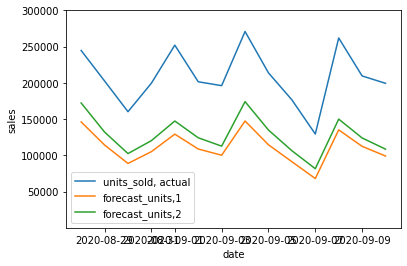

In [22]:
for i,forec in enumerate([actual_sales, 
              forec_one_pred, forec_two_pred]):
    
    plt.plot(forec, label = f"{forec.name},{ i if i>0 else ' actual'}")
    plt.gca().set(ylim = (1,300000), xlabel = 'date', ylabel = 'sales')
plt.legend()
plt.show()

### In this case we can get a good picture of which forecast is better by looking at the graphs. Even though both forecasts are underforecsting actual sales, we can clearly see that forecast 2 graph is coser to the actual

#### Section 1.3 <a class="anchor" id="section_1_3"></a>
MSE/MAE CALCULATION
### Even though we can estimate forecast quality from the graph, we will still proceed with calculating the appropriate metrics, so that we can quantify error

In [23]:
def calculate_error(metric, y_true, y_pred, **kwargs):
    return metric(y_true, y_pred, **kwargs)

In [24]:
print(calculate_error (mean_squared_error,actual_sales, forec_one_pred, squared = False),
calculate_error (mean_absolute_error,actual_sales, forec_one_pred))

98613.30609871326 96995.79585858854


In [25]:
print(calculate_error (mean_squared_error,actual_sales, forec_two_pred, squared = False),
calculate_error (mean_absolute_error,actual_sales, forec_two_pred))

82211.06245724008 80521.67492820423


In [26]:
#we can see that for both metrics forecast two is performing better than forecast one

## Part 2 <a class="anchor" id="part2"></a>
### Promotional Sales

In [27]:
#promo_sales = forecast_one[forecast_one.date >= 2020-08-28 and forecast_one.date <=2020-09-11]
promo_sales = forecast_one.query('20200828 <= date <= 20200911')

In [28]:
sorted(promo_sales.date.unique())

[numpy.datetime64('2020-08-28T00:00:00.000000000'),
 numpy.datetime64('2020-08-29T00:00:00.000000000'),
 numpy.datetime64('2020-08-30T00:00:00.000000000'),
 numpy.datetime64('2020-08-31T00:00:00.000000000'),
 numpy.datetime64('2020-09-01T00:00:00.000000000'),
 numpy.datetime64('2020-09-02T00:00:00.000000000'),
 numpy.datetime64('2020-09-03T00:00:00.000000000'),
 numpy.datetime64('2020-09-04T00:00:00.000000000'),
 numpy.datetime64('2020-09-05T00:00:00.000000000'),
 numpy.datetime64('2020-09-06T00:00:00.000000000'),
 numpy.datetime64('2020-09-07T00:00:00.000000000'),
 numpy.datetime64('2020-09-08T00:00:00.000000000'),
 numpy.datetime64('2020-09-09T00:00:00.000000000'),
 numpy.datetime64('2020-09-10T00:00:00.000000000')]

In [29]:
promo_view = promo_sales.drop(columns=['offer_type_description','promo_year_id'])

In [30]:
promo_view

,sku,date,product_category,promo_end_date,promo_start_date,promo_week_number,forecast_units
0,22700097753,2020-09-08,mass color cosmetics,2020-09-10,2020-09-04,24,4.581274
1,22700106349,2020-08-29,mass color cosmetics,2020-09-03,2020-08-28,23,1.684020
2,309970078836,2020-09-03,mass color cosmetics,2020-09-03,2020-08-28,23,1.707769
3,309974994019,2020-08-29,mass color cosmetics,2020-09-03,2020-08-28,23,2.058398
4,309975415063,2020-09-08,mass color cosmetics,2020-09-10,2020-09-04,24,1.995100
...,...,...,...,...,...,...,...
92130,57475033910,2020-09-02,diabetes,2020-09-03,2020-08-28,23,2.645678
92131,771058119128,2020-09-02,diabetes,2020-09-03,2020-08-28,23,4.086077
92132,57475031008,2020-09-03,diabetes,2020-09-03,2020-08-28,23,1.792034
92133,57475242527,2020-08-30,diabetes,2020-09-03,2020-08-28,23,1.523700


In [31]:
promo_view.product_category.nunique()

68

In [32]:
promo_view['promo_sale'] =  (promo_view['date'] >= promo_view['promo_start_date']) &  (promo_view['date']<= promo_view['promo_end_date'])

In [33]:
promo_view

,sku,date,product_category,promo_end_date,promo_start_date,promo_week_number,forecast_units,promo_sale
0,22700097753,2020-09-08,mass color cosmetics,2020-09-10,2020-09-04,24,4.581274,True
1,22700106349,2020-08-29,mass color cosmetics,2020-09-03,2020-08-28,23,1.684020,True
2,309970078836,2020-09-03,mass color cosmetics,2020-09-03,2020-08-28,23,1.707769,True
3,309974994019,2020-08-29,mass color cosmetics,2020-09-03,2020-08-28,23,2.058398,True
4,309975415063,2020-09-08,mass color cosmetics,2020-09-10,2020-09-04,24,1.995100,True
...,...,...,...,...,...,...,...,...
92130,57475033910,2020-09-02,diabetes,2020-09-03,2020-08-28,23,2.645678,True
92131,771058119128,2020-09-02,diabetes,2020-09-03,2020-08-28,23,4.086077,True
92132,57475031008,2020-09-03,diabetes,2020-09-03,2020-08-28,23,1.792034,True
92133,57475242527,2020-08-30,diabetes,2020-09-03,2020-08-28,23,1.523700,True


In [34]:
promo_view.promo_sale.value_counts()

True     90406
False     1729
Name: promo_sale, dtype: int64

In [35]:
def unique(s):
    return s.nunique(dropna=False)

def total(s):
    return s.count()

def total_sales_on_promo(s):
    return s.where (s==True).count()

def distinct_promo(s):
    return s.where (s==True).nunique(dropna=False)

agg_func_custom_count = {
    'sku': [unique, total], 'promo_sale':[total_sales_on_promo]}
promo_view=promo_view.groupby(['promo_week_number', 'product_category']).agg(agg_func_custom_count)

In [36]:
promo_view

sku                 promo_sale
                                     unique total total_sales_on_promo
promo_week_number product_category                                    
23                analgesics             61   407                  407
                  antihistamines         35   232                  211
                  ap/deo                253  1683                 1662
                  audio/video            57   315                  315
                  baby accessories       29   198                  198
...                                     ...   ...                  ...
24                stamps                 16    72                   72
                  stationery            100   636                  636
                  supports               22   109                  109
                  trial and travel       79   379                  379
                  vitamins & herbals    742  4443                 4443

[130 rows x 3 columns]

## Part 3 <a class="anchor" id="part3"></a>
### Generating forecast

In [37]:
sales.head()

,sku,product_category,transaction_date,promo_year_id,promo_week_number,units_sold,units_revenue
0,68305839534,oral care,2020-09-19,2021,26,25.0,58.58
1,817513010132,hair care,2020-09-19,2021,26,1.0,18.99
2,56100029274,oral care,2020-09-19,2021,26,39.0,175.11
3,309976768021,mass color cosmetics,2020-09-19,2021,26,3.0,47.97
4,64541300623,cough & cold,2020-09-19,2021,26,15.0,136.15


In [38]:
high_revenue_cat = sales.groupby(['product_category','units_revenue']).sum().sort_values('units_revenue', ascending = False)
high_revenue_cat

sku  promo_year_id  \
product_category              units_revenue                                 
open department hhc & deposit 43341.36        410999001009           2021   
                              21091.46        410999001009           2021   
                              19759.89        410999001009           2021   
beauty/fashion                15449.34        722950343036           2021   
                              15373.03        722950343036           2021   
...                                                    ...            ...   
other gm                      0.08            135768005594           4042   
seasonal gm                   0.05             68618120985           2021   
                              0.02            676844224652           2021   
derm                          0.01           3337871322519           2021   
nail care                     0.01            309970037949           2021   

                                             promo_week_number  units_sold  
product_category              units_revenue                                 
open department hhc & deposit 43341.36                      23        13.0  
                              21091.46                      26         1.0  
                              19759.89                      25         1.0  
beauty/fashion                15449.34                      23      1718.0  
                              15373.03                      23      1592.0  
...                                                        ...         ...  
other gm                      0.08                          49         4.0  
seasonal gm                   0.05                          25         1.0  
                              0.02                          26         2.0  
derm                          0.01                          24         1.0  
nail care                     0.01                          23         1.0  

[219476 rows x 4 columns]

In [39]:
#we can see that the highest revenue category is "open department hhc & deposit"
high_revenue_df = sales[sales['product_category']==high_revenue_cat.index[0][0]]

In [40]:
high_revenue_df

,sku,product_category,transaction_date,promo_year_id,promo_week_number,units_sold,units_revenue
114085,410999001009,open department hhc & deposit,2020-09-11,2021,25,1.0,19759.89
187068,410999001009,open department hhc & deposit,2020-09-14,2021,25,8.0,1412.55
508732,410999001009,open department hhc & deposit,2020-09-03,2021,23,13.0,43341.36
524051,410999001009,open department hhc & deposit,2020-09-18,2021,26,1.0,21091.46


In [41]:
sales[sales['product_category']=='open department hhc & deposit']

,sku,product_category,transaction_date,promo_year_id,promo_week_number,units_sold,units_revenue
114085,410999001009,open department hhc & deposit,2020-09-11,2021,25,1.0,19759.89
187068,410999001009,open department hhc & deposit,2020-09-14,2021,25,8.0,1412.55
508732,410999001009,open department hhc & deposit,2020-09-03,2021,23,13.0,43341.36
524051,410999001009,open department hhc & deposit,2020-09-18,2021,26,1.0,21091.46


### seems like the highest revenue category only has 5 records and no transactions on most days. It wouldn't be possible to train a model on this little data, let's check the second highest revenue category to see if there's more transactions available

In [42]:
sales[sales['product_category']=='beauty/fashion']

,sku,product_category,transaction_date,promo_year_id,promo_week_number,units_sold,units_revenue
51,727706137013,beauty/fashion,2020-09-19,2021,26,1.0,10.99
197,770115016295,beauty/fashion,2020-09-05,2021,24,1.0,19.99
413,727706134869,beauty/fashion,2020-09-13,2021,25,1.0,15.99
472,68459205261,beauty/fashion,2020-08-30,2021,23,2.0,24.99
586,727706134678,beauty/fashion,2020-09-04,2021,24,1.0,5.45
...,...,...,...,...,...,...,...
531734,727706955334,beauty/fashion,2020-09-04,2021,24,1.0,4.00
531790,727706135385,beauty/fashion,2020-09-08,2021,24,2.0,25.98
531813,727706954795,beauty/fashion,2020-09-08,2021,24,2.0,21.98
531842,33983236494,beauty/fashion,2020-09-18,2021,26,2.0,19.98


In [43]:
sales_high_revenue=sales[sales['product_category']=='beauty/fashion']

In [44]:
sales_high_revenue.head()

,sku,product_category,transaction_date,promo_year_id,promo_week_number,units_sold,units_revenue
51,727706137013,beauty/fashion,2020-09-19,2021,26,1.0,10.99
197,770115016295,beauty/fashion,2020-09-05,2021,24,1.0,19.99
413,727706134869,beauty/fashion,2020-09-13,2021,25,1.0,15.99
472,68459205261,beauty/fashion,2020-08-30,2021,23,2.0,24.99
586,727706134678,beauty/fashion,2020-09-04,2021,24,1.0,5.45


In [45]:
sales_high_revenue.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8621 entries, 51 to 532008
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   sku                8621 non-null   int64         
 1   product_category   8621 non-null   object        
 2   transaction_date   8621 non-null   datetime64[ns]
 3   promo_year_id      8621 non-null   int64         
 4   promo_week_number  8621 non-null   int64         
 5   units_sold         8621 non-null   float64       
 6   units_revenue      8621 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 538.8+ KB


<AxesSubplot:xlabel='transaction_date', ylabel='units_sold'>

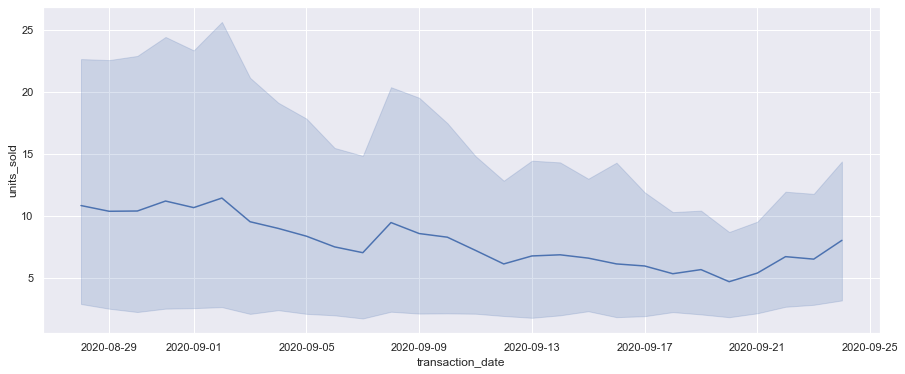

In [46]:
#ok, that's something we can work with.
import seaborn as sns
sns.set(rc = {'figure.figsize':(15,6)})
sns.lineplot(data = sales_high_revenue,x = 'transaction_date',y= 'units_sold')

In [47]:
#there is no consistent trend in the sales. They were going down, but started to pick up by the end of the period
sales_high_revenue = sales_high_revenue.sort_values("transaction_date").set_index("transaction_date")

In [48]:
time_series = sales_high_revenue.groupby('transaction_date')['units_sold'].sum()
time_series

transaction_date
2020-08-28    3441.0
2020-08-29    2858.0
2020-08-30    2364.0
2020-08-31    3444.0
2020-09-01    3976.0
2020-09-02    3094.0
2020-09-03    2836.0
2020-09-04    3325.0
2020-09-05    2649.0
2020-09-06    1963.0
2020-09-07    1340.0
2020-09-08    3224.0
2020-09-09    2725.0
2020-09-10    2773.0
2020-09-11    2540.0
2020-09-12    2077.0
2020-09-13    1677.0
2020-09-14    2161.0
2020-09-15    2368.0
2020-09-16    1875.0
2020-09-17    1914.0
2020-09-18    1907.0
2020-09-19    1786.0
2020-09-20    1221.0
2020-09-21    1666.0
2020-09-22    2377.0
2020-09-23    2071.0
2020-09-24    2326.0
Name: units_sold, dtype: float64

In [49]:
def get_train_test(df, split_percent=0.8):
    data = np.array(df.values.astype('float32'))
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data).flatten()
    n = len(data)

    split = int(n*split_percent)
    train_data = data[range(split)]
    test_data = data[split:]
    return train_data, test_data, data

In [50]:
time_series = pd.DataFrame(sales_high_revenue.groupby('transaction_date')['units_sold'].sum())

In [54]:
#splitting data into train and test

def get_train_test(data, split_percent=0.8):
    data = np.array(data.astype('float32'))
    n = len(data)
    split = int(n*split_percent)
    train_data = data[range(split)]
    test_data = data[split:]
    return train_data, test_data, data

train_data, test_data, data = get_train_test(time_series)

In [55]:
train_data

array([[3441.],
       [2858.],
       [2364.],
       [3444.],
       [3976.],
       [3094.],
       [2836.],
       [3325.],
       [2649.],
       [1963.],
       [1340.],
       [3224.],
       [2725.],
       [2773.],
       [2540.],
       [2077.],
       [1677.],
       [2161.],
       [2368.],
       [1875.],
       [1914.],
       [1907.]], dtype=float32)

In [56]:
len(time_series)

28

In [57]:
#splitting data into features and targets specific for time series
def split_set(data, time_steps):
    # Indices of target array
    Y_ind = np.arange(time_steps, len(data), time_steps)
    Y = data[Y_ind]
    # Prepare X
    rows_x = len(Y)
    X = data[range(time_steps*rows_x)]
    X = np.reshape(X, (rows_x, time_steps, 1))    
    return X, Y
 
time_steps = 5
X_train, y_train = split_set(train_data, time_steps)
X_test, y_test = split_set(test_data, time_steps)

In [58]:
X_train[:3]

array([[[3441.],
        [2858.],
        [2364.],
        [3444.],
        [3976.]],

       [[3094.],
        [2836.],
        [3325.],
        [2649.],
        [1963.]],

       [[1340.],
        [3224.],
        [2725.],
        [2773.],
        [2540.]]], dtype=float32)

In [59]:
y_train
#from what we can see, the data was split correctly

array([[3094.],
       [1340.],
       [2077.],
       [1914.]], dtype=float32)

In [62]:
early_stop = keras.callbacks.EarlyStopping(patience = 30, restore_best_weights = True)
model = keras.models.Sequential([
    keras.layers.SimpleRNN(10,input_shape = (time_steps, 1) , activation='relu', return_sequences = True),
    keras.layers.SimpleRNN(1,input_shape = (time_steps, 1) , activation='relu'),
    keras.layers.Dense(1, activation = 'relu')
])

optimizer = keras.optimizers.Adam()
model.compile(loss="mse", optimizer=optimizer, metrics = ['mae',  tf.keras.metrics.RootMeanSquaredError()])
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), callbacks = [early_stop])

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 1116700.8750 - mae: 1010.7099 - root_mean_squared_error: 1056.7407 - val_loss: 53364.9492 - val_mae: 231.0085 - val_root_mean_squared_error: 231.0085
Epoch 2/100
1/1 [==============================] - 0s 25ms/step - loss: 892885.0625 - mae: 897.2059 - root_mean_squared_error: 944.9260 - val_loss: 23185.2676 - val_mae: 152.2671 - val_root_mean_squared_error: 152.2671
Epoch 3/100
1/1 [==============================] - 0s 27ms/step - loss: 696804.3125 - mae: 784.5802 - root_mean_squared_error: 834.7480 - val_loss: 5523.1821 - val_mae: 74.3181 - val_root_mean_squared_error: 74.3181
Epoch 4/100
1/1 [==============================] - 0s 27ms/step - loss: 527714.3125 - mae: 672.7665 - root_mean_squared_error: 726.4395 - val_loss: 6.2610 - val_mae: 2.5022 - val_root_mean_squared_error: 2.5022
Epoch 5/100
1/1 [==============================] - 0s 88ms/step - loss: 390175.8750 - mae: 564.6790 - root_mean_squared_error: 624.640

In [63]:
series = np.array(time_series[-6:])
series

array([[1786.],
       [1221.],
       [1666.],
       [2377.],
       [2071.],
       [2326.]])

In [64]:
X_new,y_new = split_set(series,5)
X_new

array([[[1786.],
        [1221.],
        [1666.],
        [2377.],
        [2071.]]])

In [65]:
y_pred = model.predict(X_new)
y_pred

1/1 [==============================] - 0s 217ms/step


array([[2323.4978]], dtype=float32)

In [66]:
#predicting next 7 days of dispense
X_new,y_new=split_set(series,5)
X=X_new
for step_ahead in range(7):
    y_pred_one = model.predict(X[:,step_ahead:])[:,np.newaxis,:]
    X = np.concatenate([X, y_pred_one], axis = 1)
Y_pred = X[:,5:]
Y_pred

1/1 [==============================] - 0s 18ms/step


array([[[2323.49780273],
        [2270.73510742],
        [2256.81103516],
        [2242.16186523],
        [2237.20678711],
        [2212.81811523],
        [2199.64331055]]])

In [67]:
Y_pred.reshape(-1)[:5]

array([2323.49780273, 2270.73510742, 2256.81103516, 2242.16186523,
       2237.20678711])

In [68]:
datelist = pd.date_range('2020-09-25', periods=7).tolist()

<AxesSubplot:>

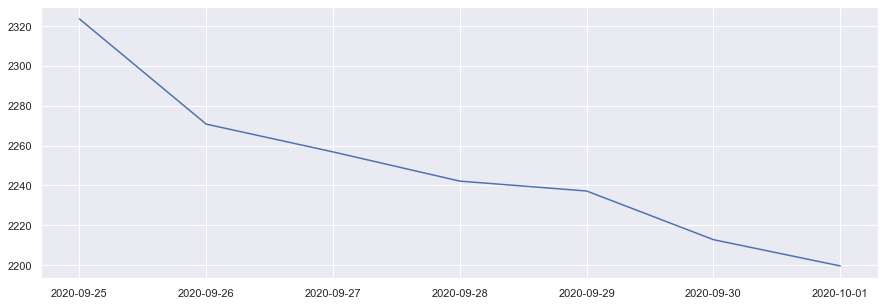

In [69]:
sns.lineplot(x = datelist,y = Y_pred.reshape(-1)[:7])

### While the predictions for the next 7 days seem to be within the real value range, given how little traning data we had, it's anybody's guess how good the predicitons are. Based on the model's validation RMSE ( 338.8163) and MAE (338.8163), both  report better results than the previous best forecast  - RMSE (80521.6749), MAE (82211.0625). We should keep in mind, though that the model predicts one day at a time (further improvements may be needed, but require a lot more data), so the real error would be much higher over 14-day period.
## Significantly more historical data is required to create a well-performing model